In [41]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import tfidf
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
df = pd.read_csv('spam.csv')

In [43]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [44]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [45]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [46]:
df.shape

(5572, 3)

In [47]:
df.Spam.value_counts()

Spam
0    4825
1     747
Name: count, dtype: int64

In [48]:
df.Message.nunique()

5157

In [49]:
df.duplicated().sum()

np.int64(415)

In [50]:
print(df[df.duplicated(keep=False)])


     Category                                            Message  Spam
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
7         ham  As per your request 'Melle Melle (Oru Minnamin...     0
8        spam  WINNER!! As a valued network customer you have...     1
9        spam  Had your mobile 11 months or more? U R entitle...     1
11       spam  SIX chances to win CASH! From 100 to 20,000 po...     1
...       ...                                                ...   ...
5524     spam  You are awarded a SiPix Digital Camera! call 0...     1
5535      ham  I know you are thinkin malaria. But relax, chi...     0
5539      ham                         Just sleeping..and surfing     0
5553      ham                        Hahaha..use your brain dear     0
5558      ham                             Sorry, I'll call later     0

[704 rows x 3 columns]


In [51]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [52]:
df.shape

(5157, 3)

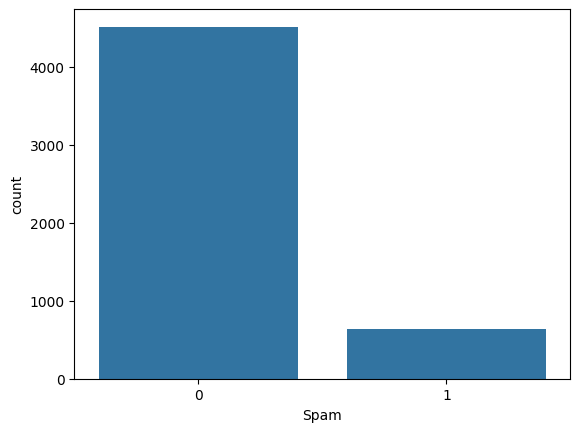

In [53]:
import seaborn as sns
sns.countplot(x='Spam', data=df)
plt.show()

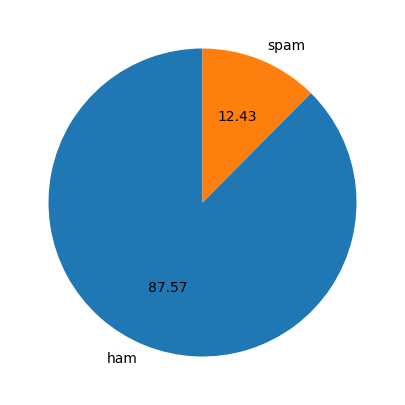

In [54]:
plt.figure(figsize=(10,5))
plt.pie(df['Spam'].value_counts(), labels=['ham', 'spam'], autopct="%1.2f", startangle=90)
plt.show()

In [55]:
X = df['Message']
y = df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X.shape

(5157,)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

models = [
    ('LogisticRegression', LogisticRegression()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB())
]

best_model = None
best_accuracy = 0
for name, model in models:
    pipeline = Pipeline([
        ('model', model),
    ])
    
    Scores = cross_val_score(estimator=pipeline, X=X_train, y=y_train, cv=5)
    
    mean_accuracy = Scores.mean()
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
        
import pickle
pickle.dump(best_model, open('email_spam_classifier.pkl', 'wb'))
print("-----------------------------------------------------------")
print(f"Best model: {name} with accuracy score: {best_accuracy}")

Model: LogisticRegression
Cross-validation Accuracy: 0.9503030303030304
Test Accuracy: 0.9709302325581395

Model: SVC
Cross-validation Accuracy: 0.9709090909090909
Test Accuracy: 0.9854651162790697

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.9658181818181818
Test Accuracy: 0.9680232558139535

Model: RandomForestClassifier
Cross-validation Accuracy: 0.9704242424242423
Test Accuracy: 0.9796511627906976



C:\Users\PC\PycharmProjects\Spam Email Detection\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\PycharmProjects\Spam Email Detection\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\PycharmProjects\Spam Email Detection\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\PC\PycharmProjects\Spam Email Detection\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Model: AdaBoostClassifier
Cross-validation Accuracy: 0.9699393939393939
Test Accuracy: 0.9670542635658915

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.9687272727272728
Test Accuracy: 0.9651162790697675

Model: MultinomialNB
Cross-validation Accuracy: 0.9488484848484848
Test Accuracy: 0.9525193798449613

Model: BernoulliNB
Cross-validation Accuracy: 0.975030303030303
Test Accuracy: 0.9767441860465116

-----------------------------------------------------------
Best model: BernoulliNB with accuracy score: 0.9854651162790697


In [61]:
model = pickle.load(open('email_spam_classifier.pkl', 'rb'))


In [64]:
# test the model with new data
def inference(message):
    message = tfidf_vectorizer.transform(message)[0]
    pred = best_model.predict(message)
    if pred == 0:
        print('This is a ham message')
    else:
        print('This is a spam message')

In [83]:
new_data = ["Don't forget about the team lunch tomorrow at 1 PM. See you there!"]
inference(new_data)

new_data = ["Congratulations! You have won 1,000,000. Claim your prize now!"]
inference(new_data)

This is a spam message
This is a ham message
